In [9]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
labtat = pd.read_csv('/content/LabTAT.csv')
labtat.head()

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0        185.35        165.53        176.70        166.13
1        170.49        185.91        198.45        160.79
2        192.77        194.92        201.23        185.18
3        177.33        183.00        199.61        176.42
4        193.41        169.57        204.63        152.60

In [11]:
labtat.describe()

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
count    120.000000    120.000000    120.000000     120.00000
mean     178.361583    178.902917    199.913250     163.68275
std       13.173594     14.957114     16.539033      15.08508
min      138.300000    140.550000    159.690000     124.06000
25%      170.335000    168.025000    188.232500     154.05000
50%      178.530000    178.870000    199.805000     164.42500
75%      186.535000    189.112500    211.332500     172.88250
max      216.390000    217.860000    238.700000     205.18000

In [12]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [13]:
labtat[labtat.duplicated()].shape

(0, 4)

In [14]:
labtat[labtat.duplicated()]

Empty DataFrame
Columns: [Laboratory 1, Laboratory 2, Laboratory 3, Laboratory 4]
Index: []

In [15]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


<ipython-input-16-00430531d4fb>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


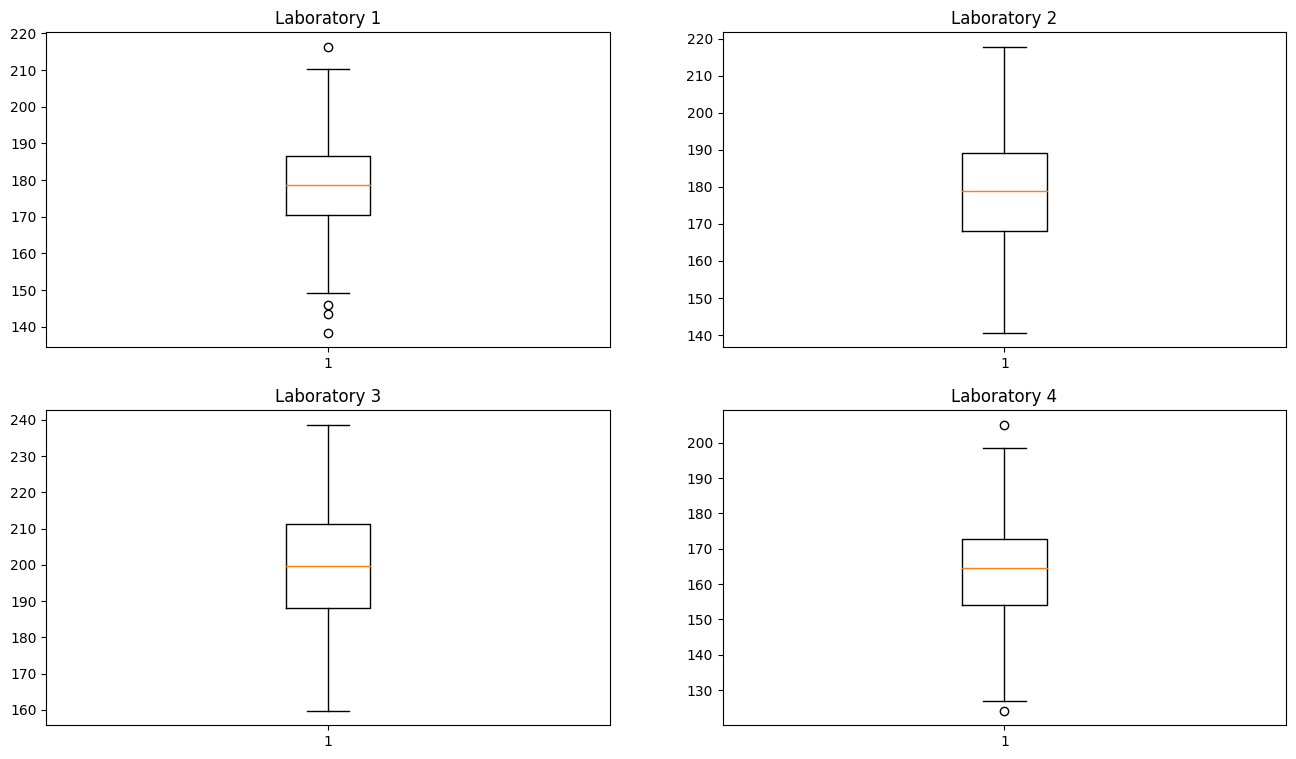

In [16]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

<ipython-input-17-d8e0df859801>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


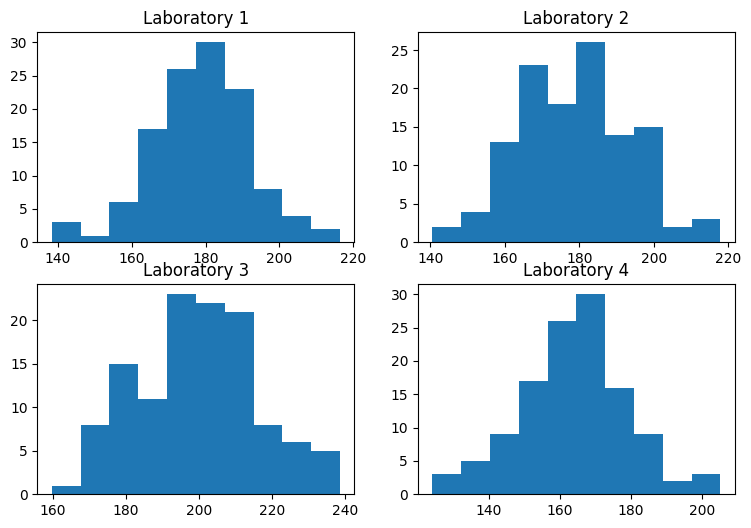

In [17]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

<ipython-input-18-500b60db26aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labtat['Laboratory 1'], kde = True)
<ipython-input-18-500b60db26aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labtat['Laboratory 2'],hist = True)
<ipython-input-18-500b60db26aa>:5: UserWarning: 

`distplot` i

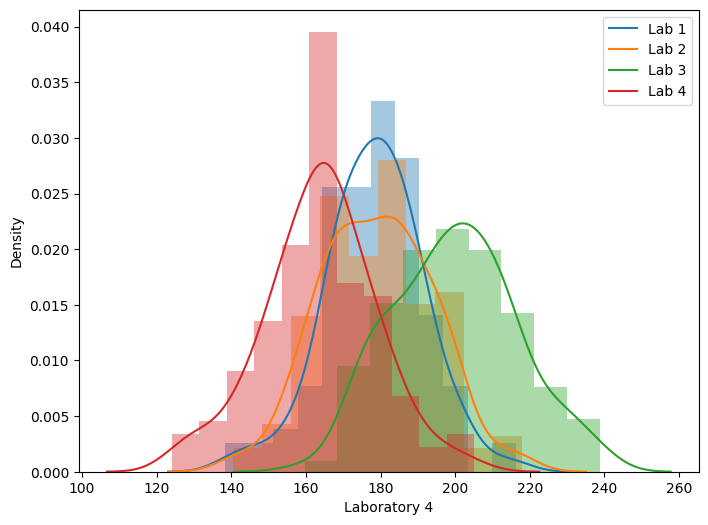

In [18]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

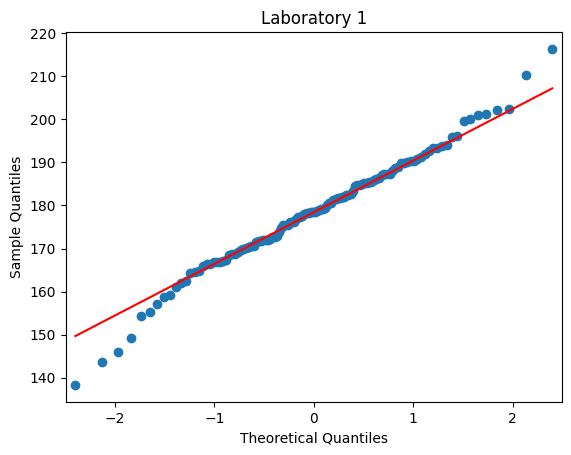

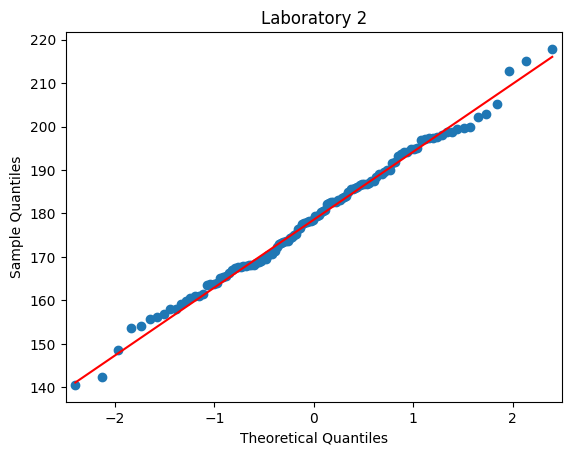

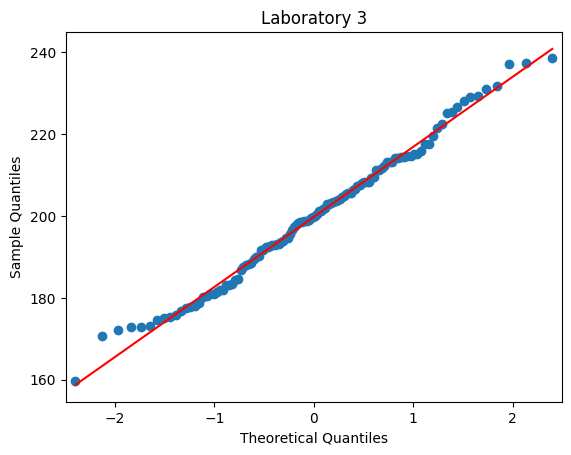

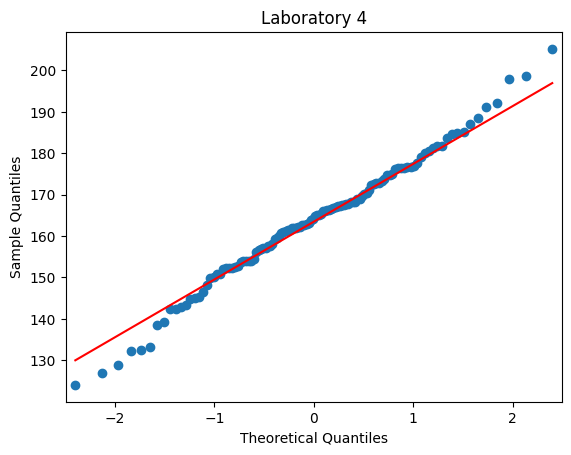

In [19]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [20]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [21]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories
